Text(-15.450000000000003, 0.5, 'Page Views')

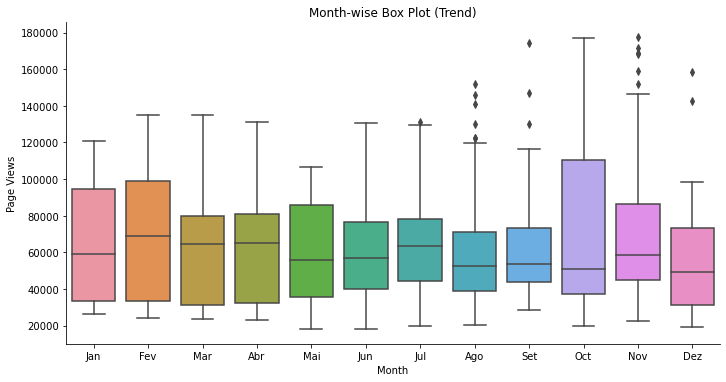

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters

#Question 1
df = pd.read_csv("fcc-forum-pageviews.csv")
df.set_index('date', inplace = True)

#Question 2
df.drop(df[(df["value"] >= df["value"].nlargest(33)[32])].index,axis=0,inplace=True)
df.drop(df[(df["value"] <= df["value"].nsmallest(33)[32])].index,axis=0,inplace=True)

#Question 3
df["value"].plot(title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019", xlabel = "Date", ylabel = "Page Views", 
                 yticks=np.arange(20000,200000,20000), figsize=(12,6), color="red")

#Question 4
df['year'] = pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month

plt.rcParams["figure.figsize"] = (11, 6)
ax = df.groupby(["year", "month"])["value"].mean().unstack().plot.bar()
ax.legend(["January","February","March","April","May","June","July","August","September","October","November","December"], title="Months")
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

#Question 5 - Graph 1
g = sns.catplot(x="year", y="value", data=df, kind="box", aspect=12/6)
plt.title('Year-wise Box Plot (Trend)')
plt.xlabel('Year')
plt.ylabel('Page Views')

#Question 5 - Graph 2
g = sns.catplot(x="month", y="value", data=df, kind="box", aspect=12/6)
plt.title('Month-wise Box Plot (Trend)')
plt.xlabel('Month')
g.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Oct','Nov','Dez'])
plt.ylabel('Page Views')